In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [27]:
df_data = pd.read_csv('CFPB-financial-wellness-data.csv')
df_data.describe()


,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,...,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,1967.854493,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,...,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,7123.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,9235.250000,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600582
50%,10901.500000,1.000000,3.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,2.000000,...,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.845213
75%,12570.750000,1.000000,3.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,3.000000,...,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.251415
max,14400.000000,3.000000,3.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.638674


In [28]:
# separating the target from all the features

df_data.dropna(inplace = True)
X = df_data.drop('PRODUSE_3', axis = 1)
y = df_data['PRODUSE_3']

In [29]:
# using RFE selector to select the top 20 features for each regression model

# Logistic Regression

In [30]:
# #Selecting the Best important features according to Logistic Regression

rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 20, step = 1)
rfe_selector.fit(X, y)

/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [31]:
features = df_data[X.columns[rfe_selector.get_support()]]
features

,FINGOALS,KHKNOWL6,KH1correct,PRODHAVE_6,PRODUSE_1,PRODUSE_2,PRODUSE_4,PRODUSE_5,PRODUSE_6,REJECTED_1,SHOCKS_1,SHOCKS_4,SHOCKS_5,SHOCKS_12,INTERCONNECTIONS_5,INTERCONNECTIONS_6,INTERCONNECTIONS_8,INTERCONNECTIONS_9,EMPLOY1_6,PPT1317
0,1,2,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
1,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,2,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
3,-1,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,1,2,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
6390,1,2,0,0,0,0,0,1,0,-1,0,0,0,1,0,0,0,0,0,0
6391,1,2,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0
6392,0,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [32]:
target = df_data['PRODUSE_3']
target

0       0
1       0
2       1
3       0
4       0
       ..
6389    0
6390    0
6391    0
6392    0
6393    1
Name: PRODUSE_3, Length: 6394, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

In [34]:
X_train

,FINGOALS,KHKNOWL6,KH1correct,PRODHAVE_6,PRODUSE_1,PRODUSE_2,PRODUSE_4,PRODUSE_5,PRODUSE_6,REJECTED_1,SHOCKS_1,SHOCKS_4,SHOCKS_5,SHOCKS_12,INTERCONNECTIONS_5,INTERCONNECTIONS_6,INTERCONNECTIONS_8,INTERCONNECTIONS_9,EMPLOY1_6,PPT1317
5732,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3795,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2953,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2500,1,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2211,1,2,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1,2,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3264,0,2,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
1653,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2607,0,2,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# make regression model 
model = sm.Logit(y_train, X_train)

# fit model and print results
results = model.fit()
#print(results.summary())

# Predict outcomes
prob_pred = results.predict(X_test)
#print(prob_pred)

y_pred = [ 0 if x < 0.5 else 1 for x in prob_pred]
_test = y_test.squeeze()

#Evaluate (Note that these default metrics provide values for y=1)
evaluation_scores = pd.Series({'Model': " Logistic Regression ",
                 'ROC AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'F1 Score': metrics.f1_score(y_test, y_pred)})

print("")
print(evaluation_scores)
print("")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(round(accuracy_score(df["Actual"], df["Predicted"])* 100, 2),"%")
print(" ")
print(" ")

         Current function value: 0.077127
         Iterations: 35

Model               Logistic Regression 
ROC AUC Score                    0.89018
Precision Score                 0.956044
Recall Score                    0.783784
Accuracy Score                  0.978108
F1 Score                        0.861386
dtype: object

[[1164    4]
 [  24   87]]
                Predicted group 0  Predicted group 1
Actual group 0               1164                  4
Actual group 1                 24                 87
 
 
              precision    recall  f1-score   support

           0      0.980     0.997     0.988      1168
           1      0.956     0.784     0.861       111

    accuracy                          0.978      1279
   macro avg      0.968     0.890     0.925      1279
weighted avg      0.978     0.978     0.977      1279

 
 
Accuracy score is
97.81 %
 
 


/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'pandas.core.series.Series'>
<class 'list'>
[[1164    4]
 [  24   87]]


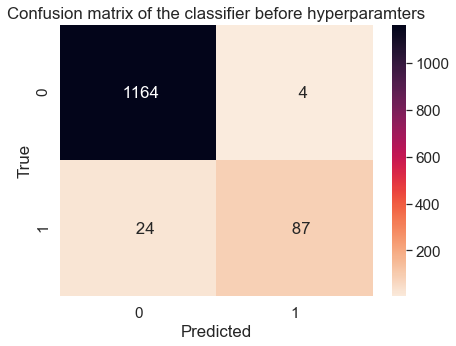

In [37]:
# creating a confusion matrix
print(type(y_test))
print(type(y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

# Test 2: Logistic Regression

In [44]:
selector = SelectKBest(f_classif, k = 20)

X_0 = selector.fit_transform(X, y)

X_f = pd.DataFrame(X_0, columns = X.columns[selector.get_support()])
#X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

test2_features = X.columns[selector.get_support()]

In [45]:
features = df_data[test2_features]
target = df_data['PRODUSE_3']
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [46]:
# make regression model 
model = sm.Logit(y_train, X_train)

# fit model and print results
results = model.fit()
#print(results.summary())

# Predict outcomes
prob_pred = results.predict(X_test)
#print(prob_pred)

y_pred = [ 0 if x < 0.5 else 1 for x in prob_pred]
_test = y_test.squeeze()

#Evaluate (Note that these default metrics provide values for y=1)
evaluation_scores = pd.Series({'Model': " Logistic Regression ",
                 'ROC AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'F1 Score': metrics.f1_score(y_test, y_pred)})

print("")
print(evaluation_scores)
print("")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(round(accuracy_score(df["Actual"], df["Predicted"])* 100, 2),"%")
print(" ")
print(" ")

         Current function value: 0.135597
         Iterations: 35

Model               Logistic Regression 
ROC AUC Score                   0.631302
Precision Score                 0.516129
Recall Score                    0.288288
Accuracy Score                  0.914777
F1 Score                        0.369942
dtype: object

[[1138   30]
 [  79   32]]
                Predicted group 0  Predicted group 1
Actual group 0               1138                 30
Actual group 1                 79                 32
 
 
              precision    recall  f1-score   support

           0      0.935     0.974     0.954      1168
           1      0.516     0.288     0.370       111

    accuracy                          0.915      1279
   macro avg      0.726     0.631     0.662      1279
weighted avg      0.899     0.915     0.904      1279

 
 
Accuracy score is
91.48 %
 
 


/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'pandas.core.series.Series'>
<class 'list'>
[[1138   30]
 [  79   32]]


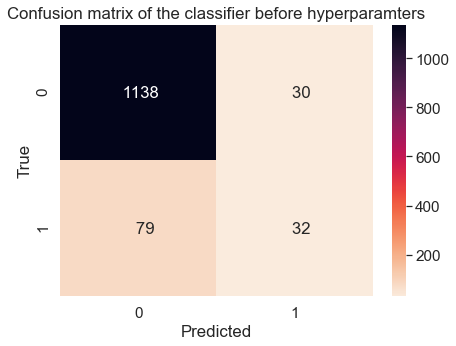

In [47]:
# creating a confusion matrix
print(type(y_test))
print(type(y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()